# Lecture 20 - ROC Curves; k-Nearest Neighbors

# ROC Curves

**Receiver Operating Characteristic (ROC) curve** is the plot between the true positive rate (TPR) and the false positive rate (FPR), where the TPR is defined as the y-axis and FPR is defined as the x-axis.

* ROC curves were first developed for RADAR systems, hence the name.

* Given a binary classifier and its threshold, the (x,y) coordinates of ROC space can be calculated from all the prediction result. You trace out a ROC curve by varying the threshold to get all of the points on the ROC.

* The diagonal between (0,0) and (1,1) separates the ROC space into two areas, which are left up area and right bottom area. The points above the diagonal represent good classification (better than random guess) which below the diagonal represent bad classification (worse than random guess).

* *What is the perfect prediction point in a ROC curve?*


## Area Under the Curve (AUC)

**Area Under Curve (AUC)** is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

## Example

1. Suppose you have a target detection task that you would like to evaluate using ROC curve analysis. You emplaced 10 targets and collected aerial hyperspectral imagery over 10 $km^2$. Then, suppose you ran a set of alarm generation and target detection algorithms over the collected data. Your algorithms produced the following list of alarm confidence values. You have already matched each of these alarms to a location on the ground and compared them with you ground truth. True targets, based on your ground truth, are marked with a "T" in the second column. Draw the associated ROC cure for these results.

Alarm confidence values |  0.91  |  0.90  |  0.80  |  0.79  |  0.77  |  0.75  |  0.50  |  0.40  |  0.39  |  0.38  |  0.37  |  0.25  |  0.10  |  0.09  |  0.01  |
------------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
    Ground truth        |   T    |   T    |        |   T    |        |        |        |   T    |        |        |        |        |        |   T    |        |


2. Suppose you were segmenting a data set into three classes (e.g., vegetation, man-made materials, sand) and wanted to evaluate your results. Would using a ROC curve be an appropriate method for evaluation? Why or why not?

# Non-parametric Generative Classification

We have introduced the probabilistic generative classifier, and, as we discussed, the probabilistic generative classifier requires us to assume a parametric form for each class (e.g., each class is represented by a multivarite Gaussian distribution, etc.). Because of this, the probabilistic generative classifier is a *parametric* approach.

* Parametric approaches have the drawback that the functional parametric form needs to be decided/assumed in advance and, if chosen poorly, might a poor model of the distribution that generates the data resulting in poor performance.

**Non-parametric methods** are those that do not assume a particular generating distribution for the data. The **K-nearest nerighbors (K-NN)** algorithm is one example of a non-parametric classifier.

# K-Nearest Neighbors Classifier

Nearest neighbors methods compare a test point to the $k$ nearest training data points and then estimate an output value based on the desired/true output values of the $k$ nearest training points.

* Essentially, there is no "training" other than storing the training data points and their desired outputs

* In test, you need to: 
    1. Determine which $k$ neighbors in the training data are closest to the test point; and,
    2. Determine the output value for the test point.
    
In order to find the $k$ *nearest-neighbors* in the training data, you need to define a **similarity measure** or a **dissimilarity measure**. The most common dissimilarity measure is Euclidean distrance:

* Euclidean distance: $d_E(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T(\mathbf{x}_1 - \mathbf{x}_2)}$

* City-block distance: $d_{CB}(\mathbf{x}_1,\mathbf{x}_2) = \sum_{i=1}^n |\mathbf{x}_{1i} - \mathbf{x}_{2i}|$

* Mahalanobis distance: $d_M(\mathbf{x}_1, \mathbf{x}_2) = \sqrt{(\mathbf{x}_1 - \mathbf{x}_2)^T\Sigma^{-1}(\mathbf{x}_1 - \mathbf{x}_2)}$

* Cosine angle similarity: $\cos(\theta) = \frac{\mathbf{x}_1^T \mathbf{x}_2}{\Vert\mathbf{x}_1\Vert_2^2 \Vert\mathbf{x}_2\Vert_2^2}$

* and many more.

If you are doing classification, once you find the $k$ nearest neighbors to your test point in the training data, then you can determine the class label of your test point using (most commonly) **majority vote**.

* If there are ties, they can be broken randomly or using schemes like applying the label to the closest data point in the neighborhood.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

import seaborn as sns

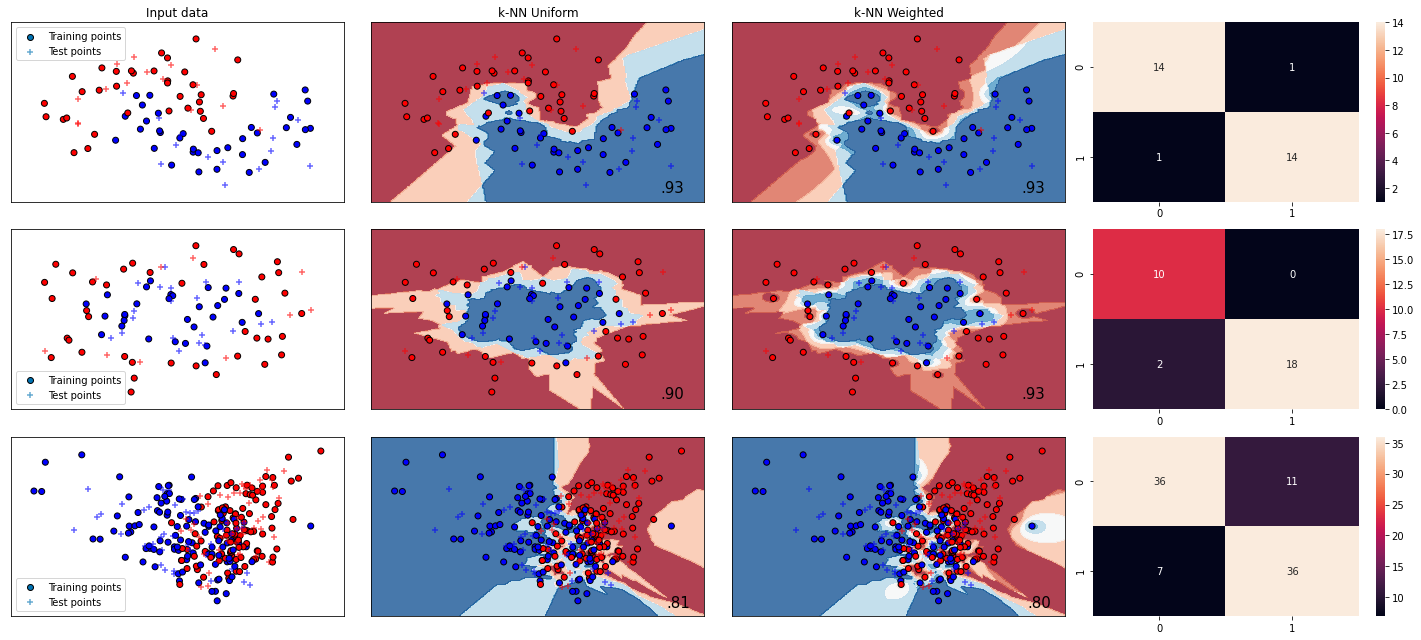

In [8]:
# Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 9))

# set up classifiers
n_neighbors = 3
classifiers = [KNeighborsClassifier(n_neighbors, weights='uniform'), \
               KNeighborsClassifier(n_neighbors, weights='distance')]
names = ["k-NN Uniform", "k-NN Weighted"]

# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k',label='Training points')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    C = confusion_matrix(y_test, y_predict)
    fig = plt.subplot(len(datasets), len(classifiers) + 2, i)
    sns.heatmap(C,annot=True)
    
#     fig.plot(fpr,tpr)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR')
#     plt.title(auc(fpr, tpr))
    i += 1
        
    

plt.tight_layout()
plt.show()

* What happens when there are imbalanced classes?

* Is k-NN sensitive to data scaling?